In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [57]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
#missing values
print(train.isnull().sum())
print('*'*50)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [60]:
#filling missing values in age column
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train['Pclass']==Pclass]['Age'].mean())
    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(add_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(add_age,axis=1)

In [61]:
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

In [62]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [63]:
#missing values
print(train.isnull().sum())
print('*'*50)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
**************************************************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [64]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [65]:
#missing values
print(train.isnull().sum())
print('*'*50)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
**************************************************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [66]:
#family column to count sibilings and parch
def combine(df,col1,col2):
    df['Family'] = df[col1] + df[col2]
    df.drop([col1,col2],inplace=True,axis=1)
    return df

train = combine(train,'SibSp','Parch')
test = combine(test,'SibSp','Parch')

In [67]:
print(train['Family'].head(10))
print('-'*50)
print(test['Family'].head(10))

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Family, dtype: int64
--------------------------------------------------
0    0
1    1
2    0
3    0
4    2
5    0
6    0
7    2
8    0
9    2
Name: Family, dtype: int64


In [68]:
train['Age'].describe()

count    891.000000
mean      29.252716
std       13.211959
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [69]:
#creating different age groups
def age_groups(df,cut_level,label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'],cut_level,labels=label_names)
    
cut_level = [-1,0,5,12,18,35,60,100]
label_names = ['Missing','Infant','Child','Teenage','Young adult','adult','senior']


In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [71]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,2


<AxesSubplot:xlabel='Age_categories'>

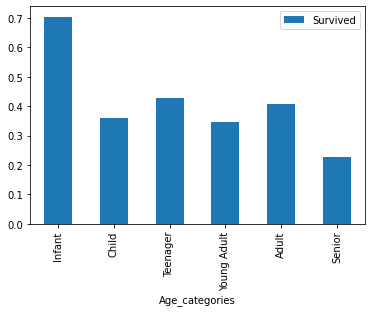

In [72]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()

In [73]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories",'Embarked']:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [74]:
train.drop(['Name','Sex','Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)
test.drop(['Name','Sex','Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)

In [75]:
train.head()

,PassengerId,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1,38.0,71.2833,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,3,1,26.0,7.9250,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
3,4,1,35.0,53.1000,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,0,35.0,8.0500,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [76]:
test.head()

,PassengerId,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,7.8292,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,893,47.0,7.0000,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,894,62.0,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,895,27.0,8.6625,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4,896,22.0,12.2875,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1


In [77]:
lr = LogisticRegression()
columns = ['PassengerId', 'Age', 'Fare','Family',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr.fit(train[columns], train["Survived"])

LogisticRegression()

In [78]:
X = train[columns]
y = train['Survived']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [79]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)

0.8100558659217877


In [80]:
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



Accuracy : (TP+TN)/Total . Describes overall, how often the classifier correct. i.e 100+50/165 Measures of Accuracy
Sensitivity and specificity are statistical measures of the performance of a binary classification test:

Sensitivity/Recall = TP/(TP + FN). When it’s actually yes, how often does it predict yes? i.e 100/(100+5)

Specificity = TN/(TN + FP).When it’s actually no, how often does it predict no?? i.e 50/(50+10)

Precision = TP/predicted yes. When it predicts yes, how often is it correct?100/(10+100)

In [53]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7752809  0.7752809  0.79775281 0.80898876 0.82022472 0.83146067
 0.83146067 0.83146067 0.83333333 0.86516854]
0.8170411985018726
